In [9]:
import pandas as pd
import numpy as np
from wrangle_zillow import wrangle_zillow
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# Exercises

## Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

In [2]:
df = wrangle_zillow()
df.head()

,baths,beds,county,latitude,longitude,build_year,home_value,logerror,mail_id
0,3.5,4,6059,33634931,-117869207,1998,1023282,0.025595,14297519
1,1.0,2,6111,34449266,-119281531,1967,464000,0.055619,17052889
2,2.0,3,6059,33886168,-117823170,1962,564778,0.005383,14186244
3,3.0,4,6037,34245180,-118240722,1970,145143,-0.103410,12177905
6,3.0,4,6037,34145202,-118179824,1950,773303,-0.001011,12095076


In [4]:
df.beds.value_counts()

beds
3     23359
4     15239
2      8340
5      3973
6       635
1       612
0       135
7       106
8        24
9         8
12        3
10        2
14        1
11        1
Name: count, dtype: int64

In [6]:
# prepping the whole dataframe to view altogether
bamboozle = df.copy()
bamboozle = bamboozle.drop(columns={'latitude', 'longitude', 'mail_id'})
bamboozle

,baths,beds,county,build_year,home_value,logerror
0,3.5,4,6059,1998,1023282,0.025595
1,1.0,2,6111,1967,464000,0.055619
2,2.0,3,6059,1962,564778,0.005383
3,3.0,4,6037,1970,145143,-0.103410
6,3.0,4,6037,1950,773303,-0.001011
...,...,...,...,...,...,...
77573,2.0,4,6037,1962,346534,0.001082
77575,2.0,2,6037,1940,354621,0.020615
77576,2.0,4,6111,1964,67205,0.013209
77577,1.0,3,6037,1954,49546,0.037129


In [7]:
# splitting the copied dataframe into train, validate, and test
train_and_validate, test = train_test_split(bamboozle, random_state=117)
train, validate = train_test_split(train_and_validate)

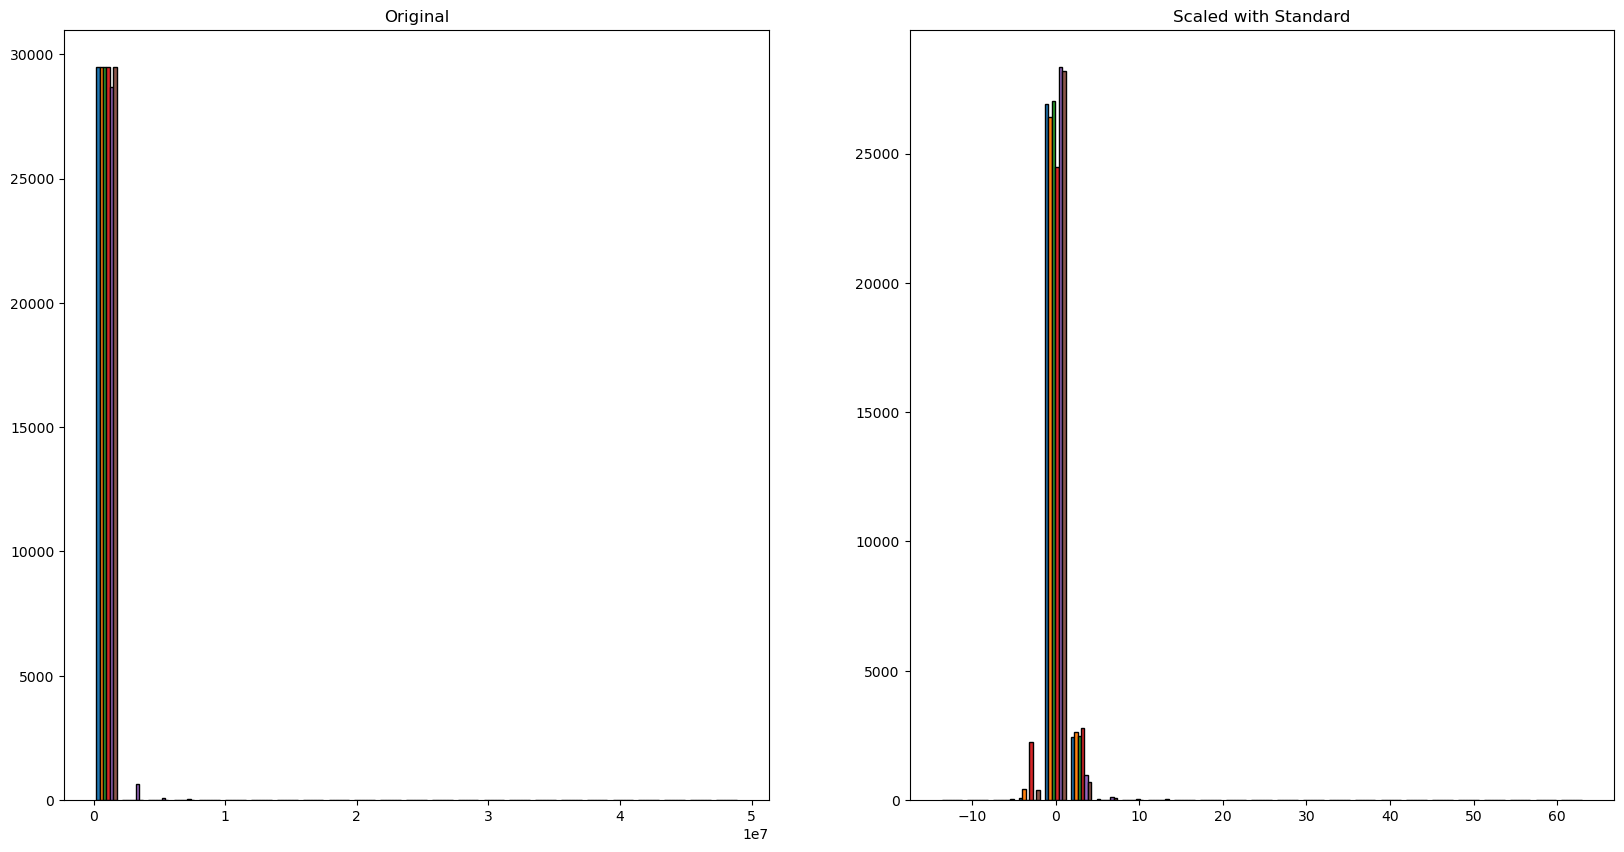

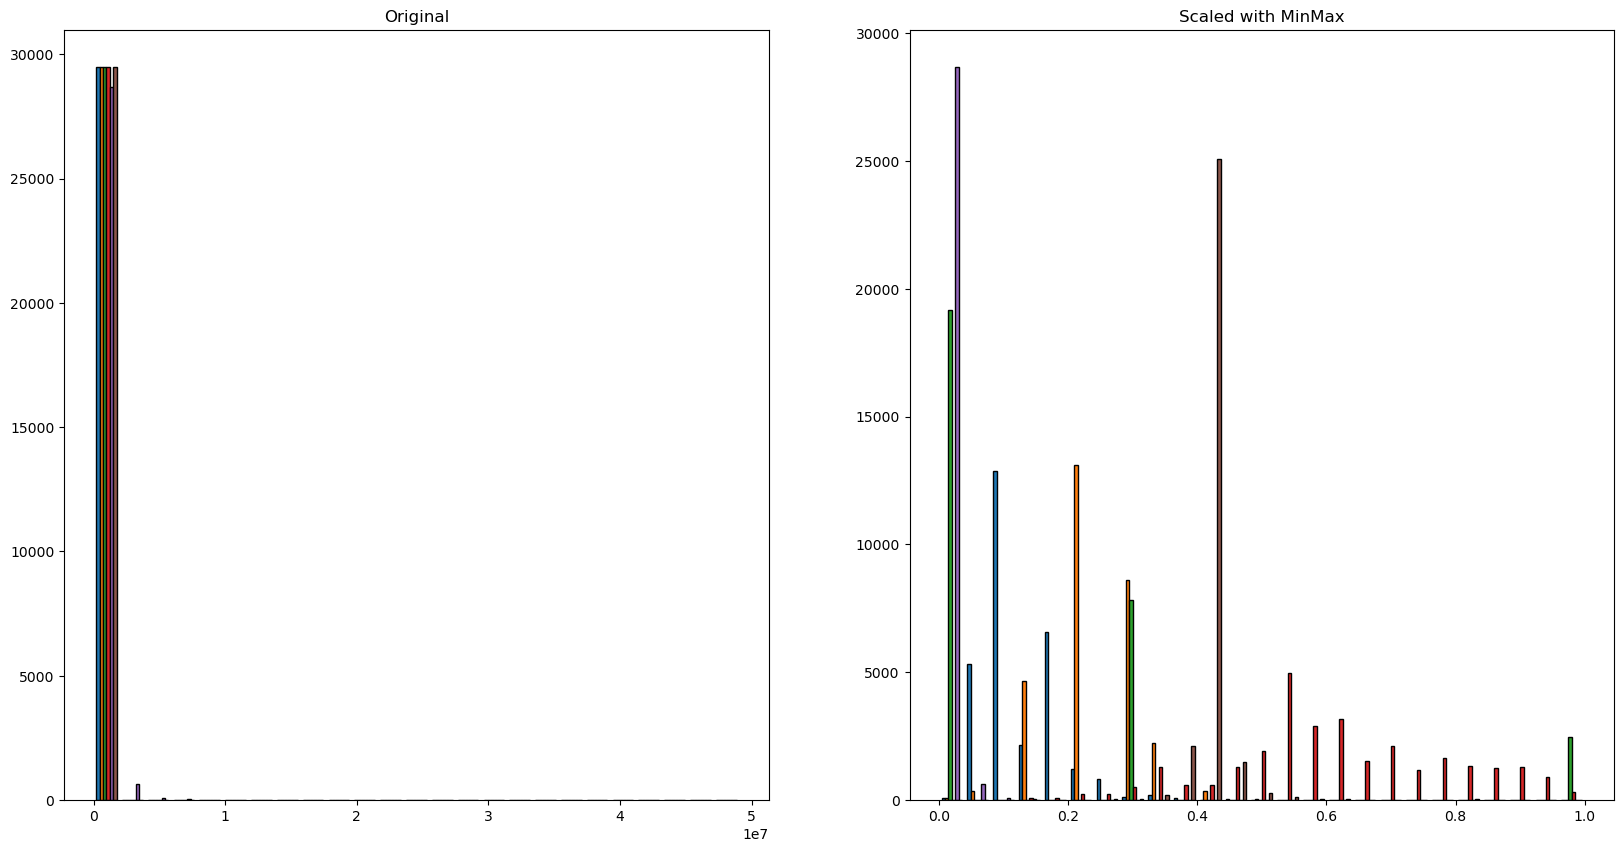

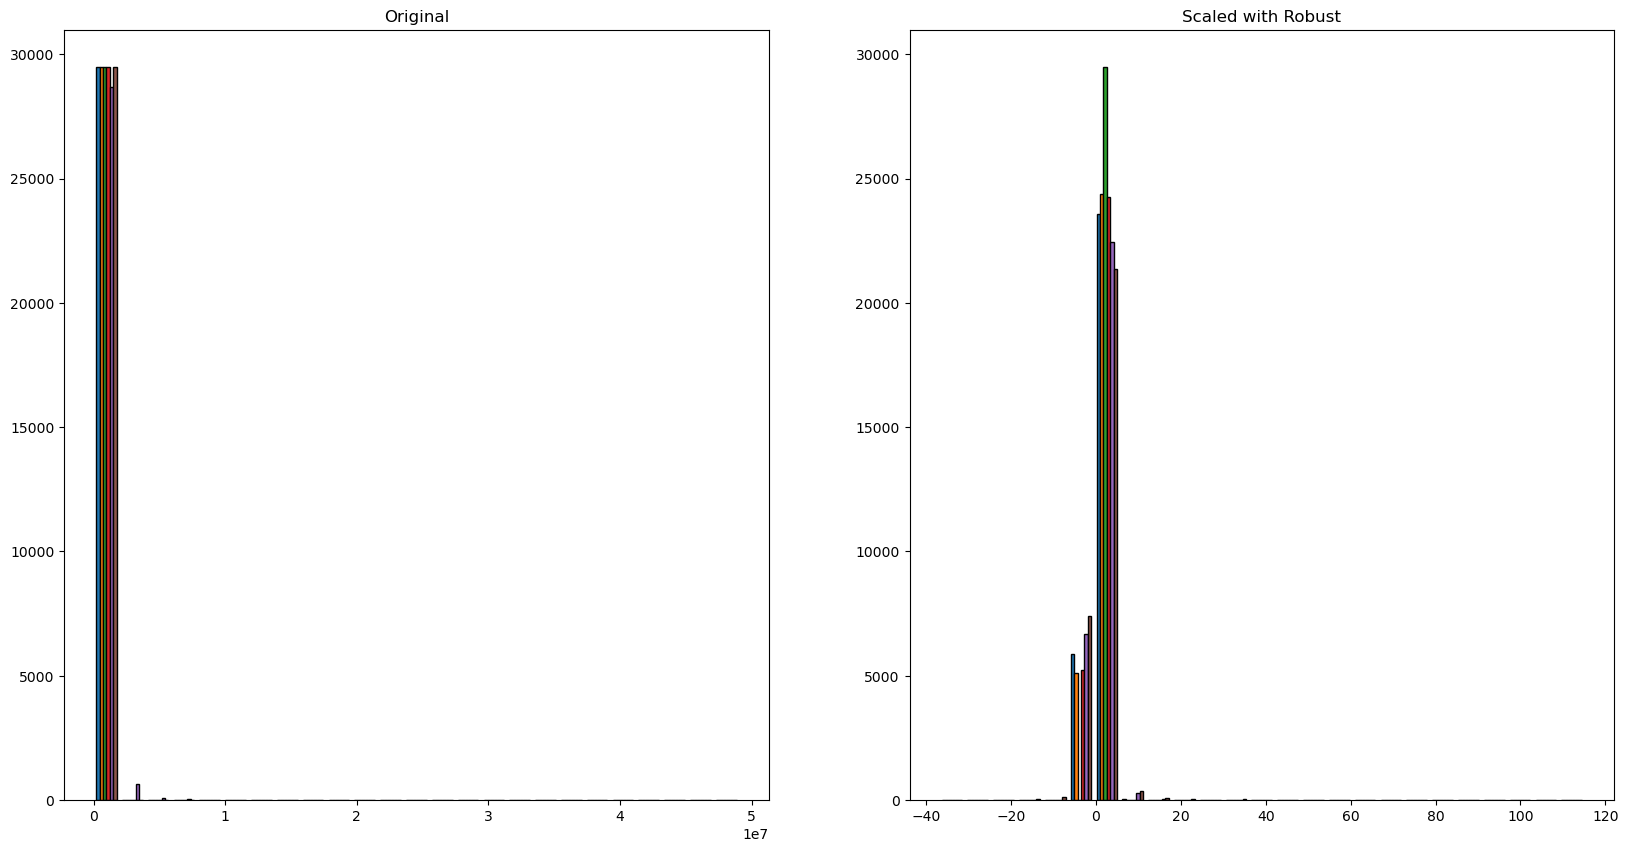

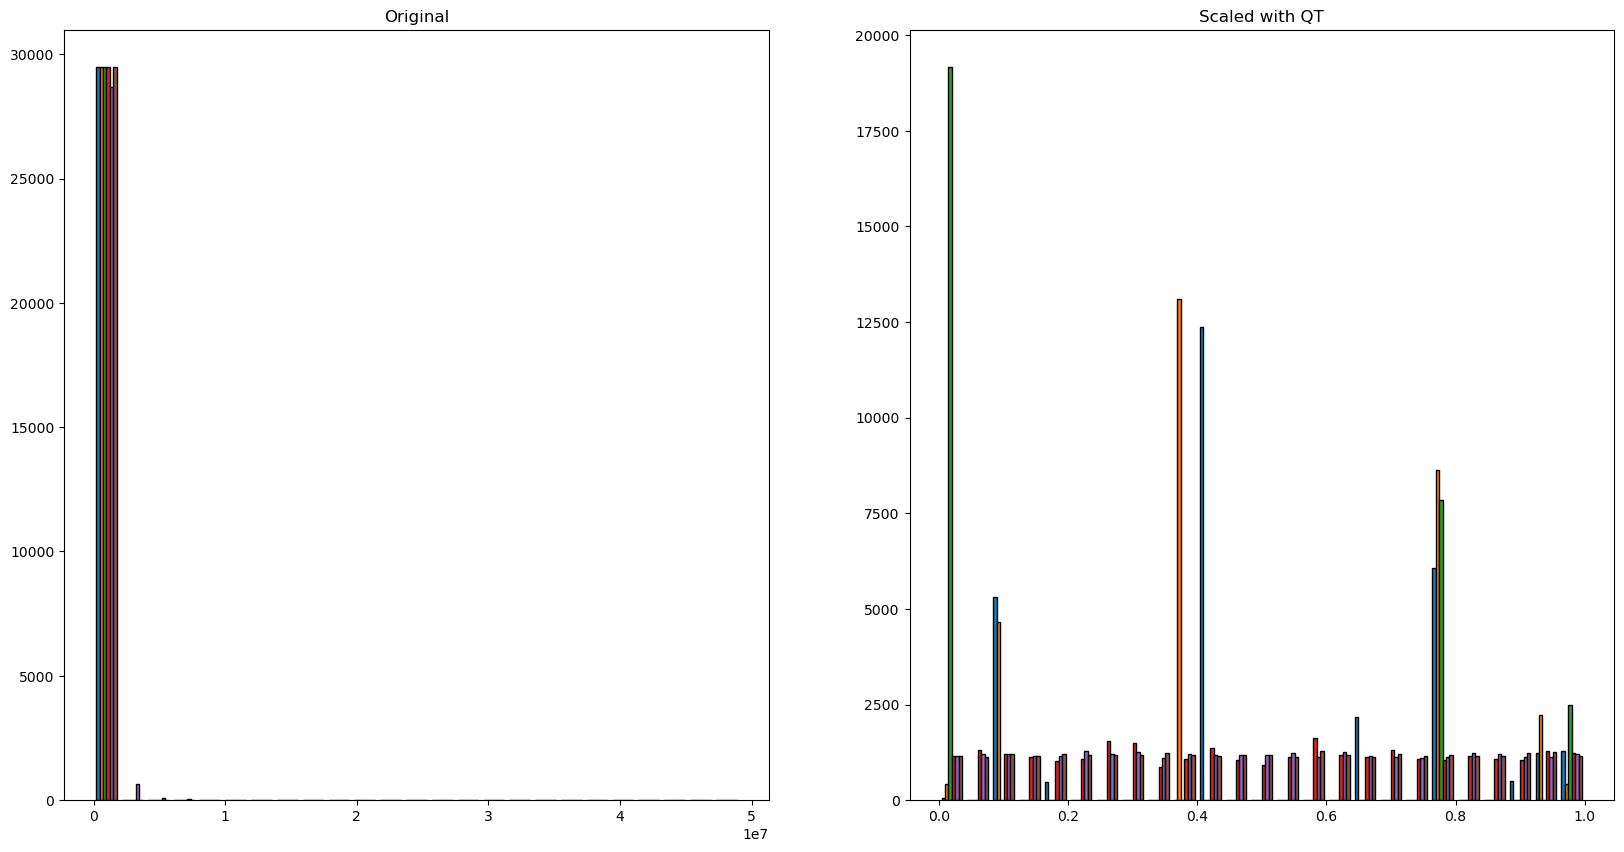

In [11]:
# determining best scaler for data
scaler = StandardScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with Standard')
plt.show()

scaler = MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with MinMax')
plt.show()


scaler = RobustScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with Robust')
plt.show()


scaler = QuantileTransformer()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with QT')
plt.show()

In [12]:
# Standard Scaler is our best so we'll scale for it
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)

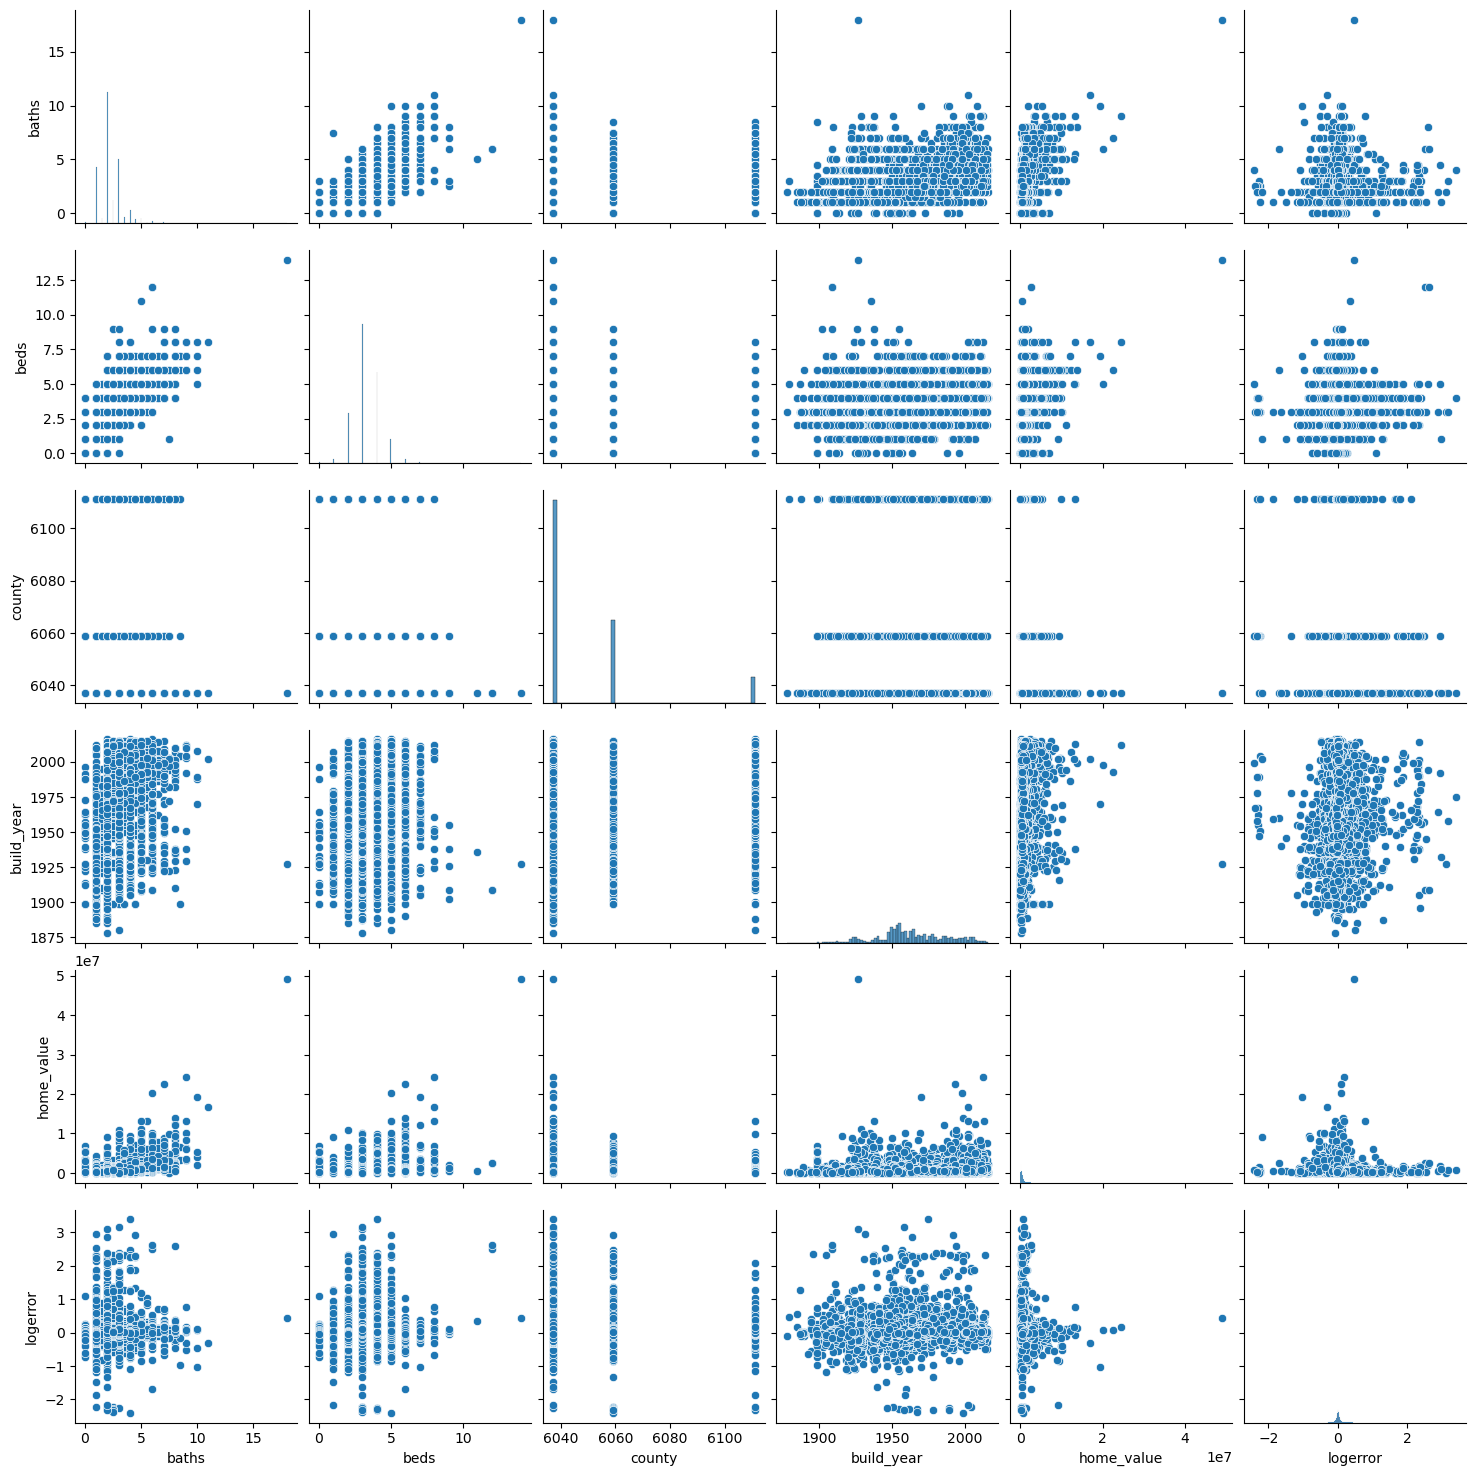

In [13]:
# plotting pairplot to view whole training set
sns.pairplot(train)
plt.show()

In [15]:
# viewing correlation of features objectively
train.drop(columns=['county']).corr()

,baths,beds,build_year,home_value,logerror
baths,1.000000,0.652791,0.520220,0.519266,0.036001
beds,0.652791,1.000000,0.387675,0.278642,0.045537
build_year,0.520220,0.387675,1.000000,0.159161,0.019833
home_value,0.519266,0.278642,0.159161,1.000000,-0.007668
logerror,0.036001,0.045537,0.019833,-0.007668,1.000000


### Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#### Is logerror significantly different for homes based on home value?

#### Is logerror significantly different for homes with half baths?

#### Is logerror significantly different for homes with more than 10 bedrooms?

### Answer those questions through a mix of statistical tests and visualizations.

#### Is logerror significantly different for homes in different counties?

In [34]:
# splitting dataframe into seperate dataframes by county for first question asked
la_county = bamboozle[bamboozle['county'] == 6037]
la_county = la_county.drop(columns='county')
orange_county = bamboozle[bamboozle['county'] == 6059]
orange_county = orange_county.drop(columns='county')
ventura_county = bamboozle[bamboozle['county'] == 6111]
ventura_county = ventura_county.drop(columns='county')

In [35]:
# splitting new county dataframes into train, validate and test
train_and_validate, la_test = train_test_split(la_county, random_state=117)
la_train, la_validate = train_test_split(train_and_validate)

train_and_validate, orange_test = train_test_split(orange_county, random_state=117)
orange_train, orange_validate = train_test_split(train_and_validate)

train_and_validate, ventura_test = train_test_split(ventura_county, random_state=117)
ventura_train, ventura_validate = train_test_split(train_and_validate)

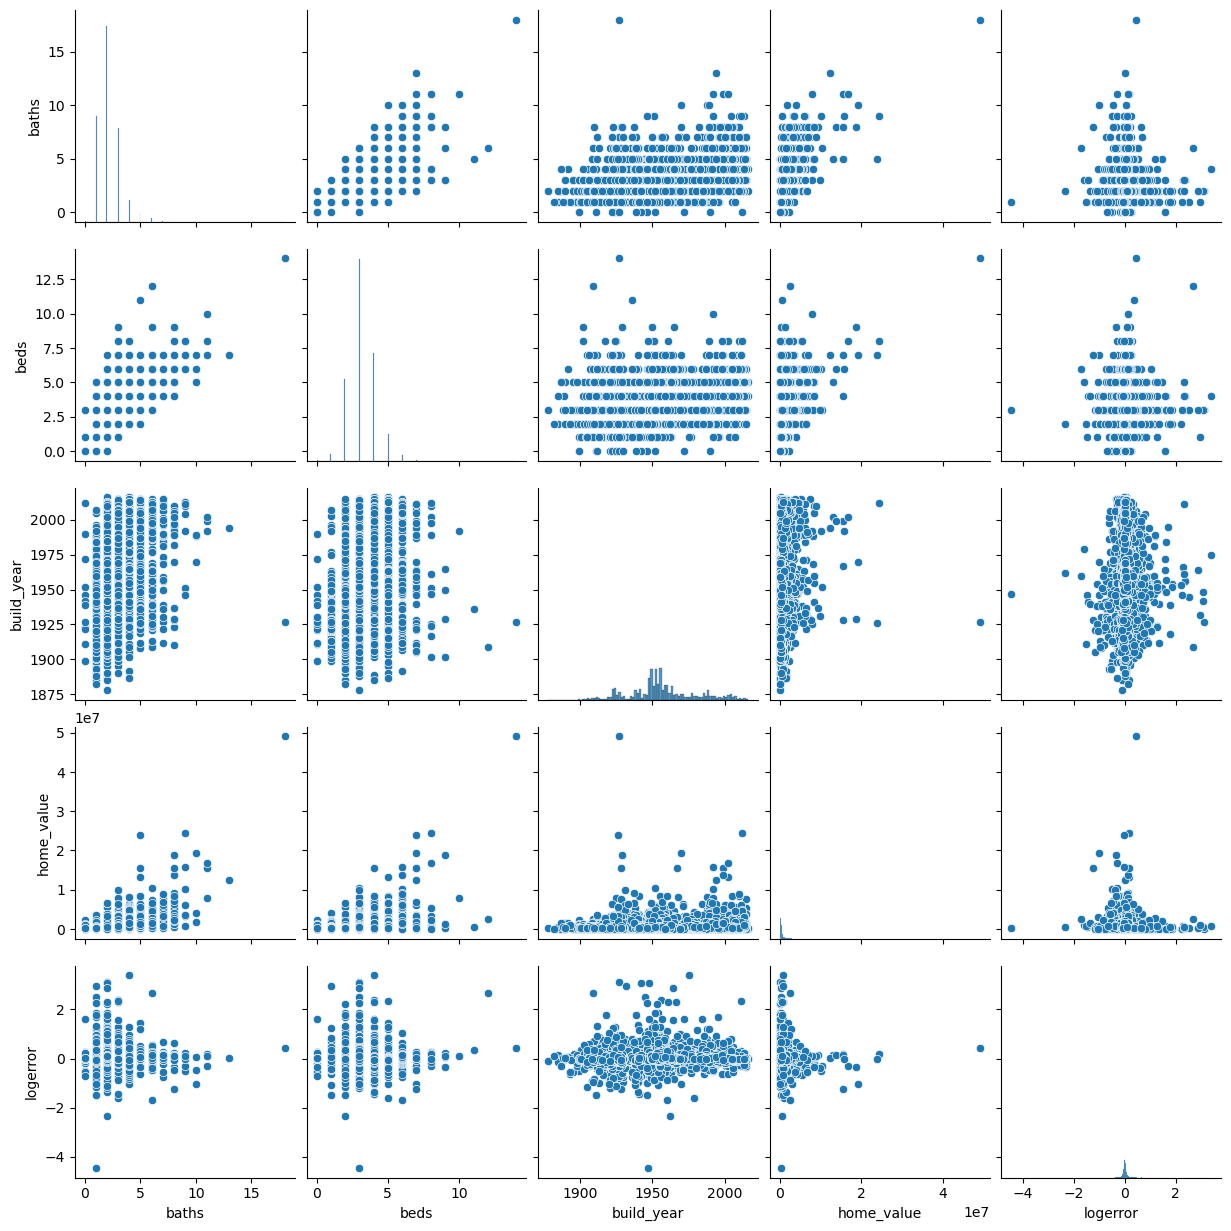

In [36]:
# plotting pairplot to view LA County
sns.pairplot(la_train)
plt.show()

In [39]:
# viewing correlation of features for LA County
la_train.corr()

,baths,beds,build_year,home_value,logerror
baths,1.000000,0.666289,0.473094,0.513001,0.022229
beds,0.666289,1.000000,0.388414,0.296449,0.035014
build_year,0.473094,0.388414,1.000000,0.086897,0.023408
home_value,0.513001,0.296449,0.086897,1.000000,-0.026699
logerror,0.022229,0.035014,0.023408,-0.026699,1.000000


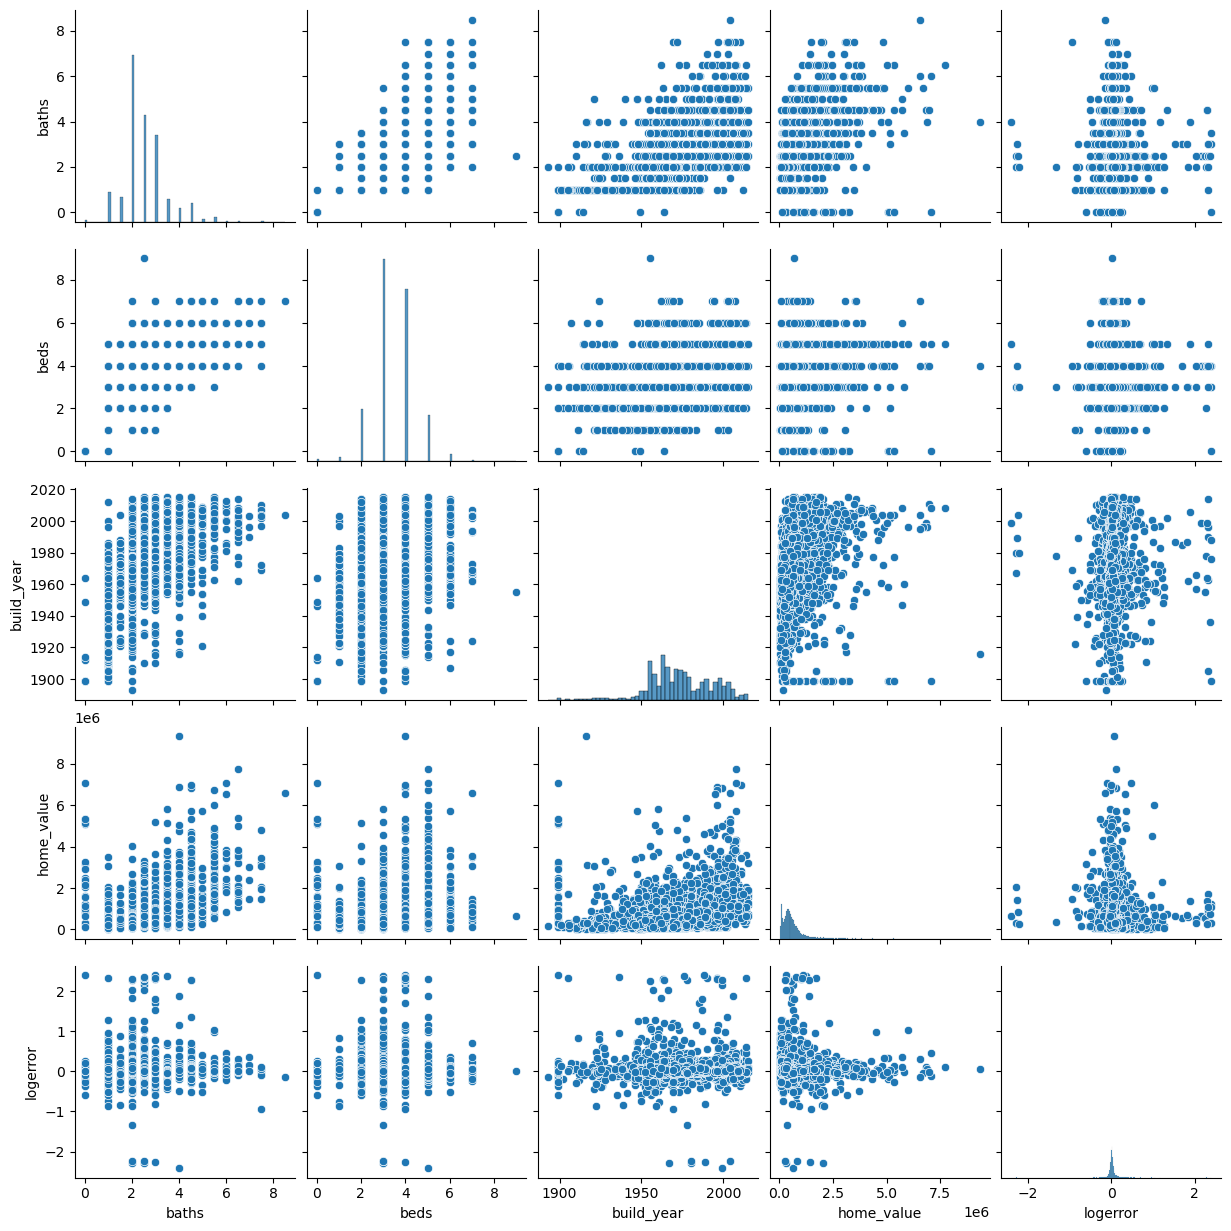

In [37]:
# plotting pairplot to view Orange County
sns.pairplot(orange_train)
plt.show()

In [40]:
# viewing correlation of features for Orange County
orange_train.corr()

,baths,beds,build_year,home_value,logerror
baths,1.000000,0.600615,0.623472,0.545488,0.027113
beds,0.600615,1.000000,0.308857,0.228646,0.012215
build_year,0.623472,0.308857,1.000000,0.332363,-0.000855
home_value,0.545488,0.228646,0.332363,1.000000,0.021565
logerror,0.027113,0.012215,-0.000855,0.021565,1.000000


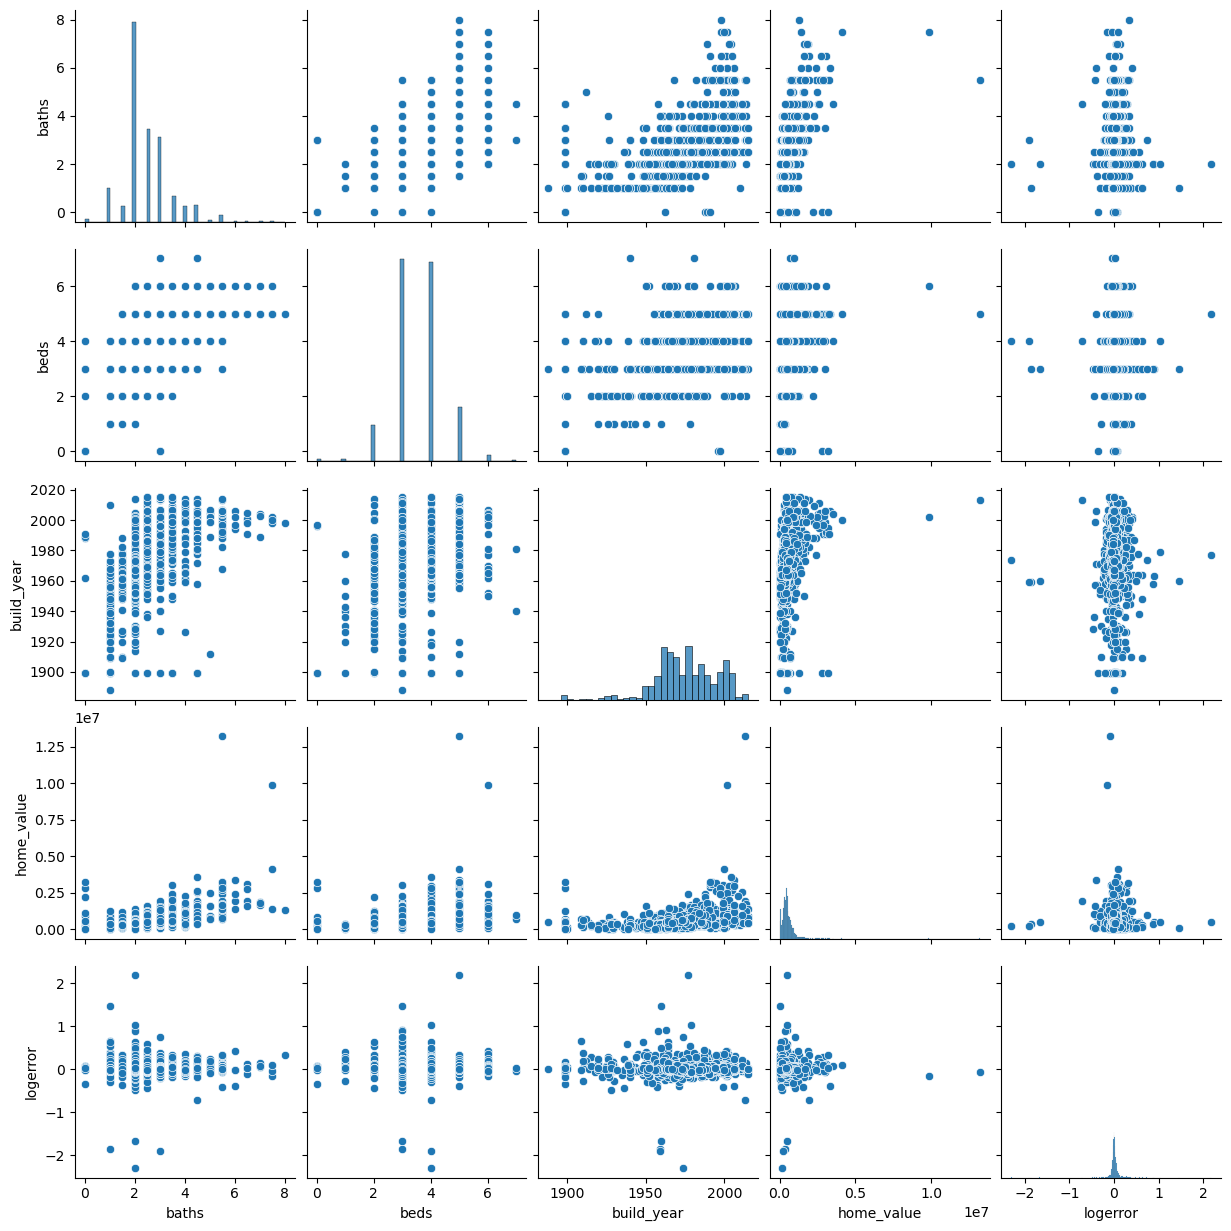

In [38]:
# plotting pairplot to view Ventura County
sns.pairplot(ventura_train)
plt.show()

In [41]:
# viewing correlation of features for Ventura County
ventura_train.corr()

,baths,beds,build_year,home_value,logerror
baths,1.000000,0.596309,0.564327,0.568380,0.013929
beds,0.596309,1.000000,0.360068,0.278586,0.028121
build_year,0.564327,0.360068,1.000000,0.346635,0.006322
home_value,0.568380,0.278586,0.346635,1.000000,-0.009949
logerror,0.013929,0.028121,0.006322,-0.009949,1.000000


#### Is logerror significantly different for homes built in different decades?

In [ ]:
# splitting dataframe into seperate dataframes by county for first question asked
semicentenial1 = (bamboozle[bamboozle['build_year'] > 1850]) & (bamboozle[bamboozle['build_year'] < 1900])
semicentenial1 = la_county.drop(columns='build_year')
semicentenial2 = (bamboozle[bamboozle['build_year'] > 1900]) & (bamboozle[bamboozle['build_year'] < 1950])
semicentenial2 = orange_county.drop(columns='build_year')
semicentenial3 = (bamboozle[bamboozle['build_year'] > 1950]) & (bamboozle[bamboozle['build_year'] < 2000])
semicentenial3 = ventura_county.drop(columns='build_year')
semicentenial4 = (bamboozle[bamboozle['build_year'] > 2000]) & (bamboozle[bamboozle['build_year'] < 2050])
semicentenial4 = ventura_county.drop(columns='build_year')

In [35]:
# splitting new county dataframes into train, validate and test
train_and_validate, la_test = train_test_split(la_county, random_state=117)
la_train, la_validate = train_test_split(train_and_validate)

train_and_validate, orange_test = train_test_split(orange_county, random_state=117)
orange_train, orange_validate = train_test_split(train_and_validate)

train_and_validate, ventura_test = train_test_split(ventura_county, random_state=117)
ventura_train, ventura_validate = train_test_split(train_and_validate)

In [39]:
# viewing correlation of features for LA County
la_train.corr()

,baths,beds,build_year,home_value,logerror
baths,1.000000,0.666289,0.473094,0.513001,0.022229
beds,0.666289,1.000000,0.388414,0.296449,0.035014
build_year,0.473094,0.388414,1.000000,0.086897,0.023408
home_value,0.513001,0.296449,0.086897,1.000000,-0.026699
logerror,0.022229,0.035014,0.023408,-0.026699,1.000000


In [82]:
train.build_year.sort_values()

40896    1878
60886    1880
1701     1885
7897     1885
77554    1887
         ... 
55618    2015
31234    2015
10121    2016
8720     2016
58800    2016
Name: build_year, Length: 29496, dtype: int64

## Bonus:

### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.